In [1]:
from _utils import *

# Load dataset from file
folder_path = '/mnt/home/tudomlumleart/ceph/10_ToniaDataset/ToniaDataset_withPolys.mat'

dataset = scipy.io.loadmat(folder_path)

# Hox locus dataset
nHox = 72
ctcfNtPolysHox = dataset['ctcfNtPolysHox']
ctcfPolysHox = dataset['ctcfPolysHox']
ntPolysHox = dataset['ntPolysHox']
radNtPolysHox = dataset['radNtPolysHox']
radPolysHox = dataset['radPolysHox']

# Sox locus dataset
nSox = 93
ctcfNtPolysSox = dataset['ctcfNtPolysSox']
ctcfPolysSox = dataset['ctcfPolysSox']
ntPolysSox = dataset['ntPolysSox']
radNtPolysSox = dataset['radNtPolysSox']
radPolysSox = dataset['radPolysSox']

# Interpolate polymers to fill in the NaN values 
ctcfNtPolysHox = interpolate_polymers(ctcfNtPolysHox)
ctcfPolysHox = interpolate_polymers(ctcfPolysHox)
ntPolysHox = interpolate_polymers(ntPolysHox)
radNtPolysHox = interpolate_polymers(radNtPolysHox)
radPolysHox = interpolate_polymers(radPolysHox)

ctcfNtPolysSox = interpolate_polymers(ctcfNtPolysSox)
ctcfPolysSox = interpolate_polymers(ctcfPolysSox)
ntPolysSox = interpolate_polymers(ntPolysSox)
radNtPolysSox = interpolate_polymers(radNtPolysSox)
radPolysSox = interpolate_polymers(radPolysSox)

# Generate distance maps from interpolated polymers
ctcfNtMapsHox = calculate_distance_map(ctcfNtPolysHox)
ctcfMapsHox = calculate_distance_map(ctcfPolysHox)
ntMapsHox = calculate_distance_map(ntPolysHox)
radNtMapsHox = calculate_distance_map(radNtPolysHox)
radMapsHox = calculate_distance_map(radPolysHox)

ctcfNtMapsSox = calculate_distance_map(ctcfNtPolysSox)
ctcfMapsSox = calculate_distance_map(ctcfPolysSox)
ntMapsSox = calculate_distance_map(ntPolysSox)
radNtMapsSox = calculate_distance_map(radNtPolysSox)
radMapsSox = calculate_distance_map(radPolysSox)

# Generate flatten maps from distance maps
ctcfNtFlattenHox = np.array([x.flatten() for x in ctcfNtMapsHox])
ctcfFlattenHox = np.array([x.flatten() for x in ctcfMapsHox])
ntFlattenHox = np.array([x.flatten() for x in ntMapsHox])
radNtFlattenHox = np.array([x.flatten() for x in radNtMapsHox])
radFlattenHox = np.array([x.flatten() for x in radMapsHox])

ctcfNtFlattenSox = np.array([x.flatten() for x in ctcfNtMapsSox])
ctcfFlattenSox = np.array([x.flatten() for x in ctcfMapsSox])
ntFlattenSox = np.array([x.flatten() for x in ntMapsSox])
radNtFlattenSox = np.array([x.flatten() for x in radNtMapsSox])
radFlattenSox = np.array([x.flatten() for x in radMapsSox])

allFlattenHox = np.concatenate((ctcfNtFlattenHox, ctcfFlattenHox, ntFlattenHox, radNtFlattenHox, radFlattenHox), axis=0)


2024-10-01 18:04:45.344492: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-01 18:04:45.674359: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI AVX512_BF16, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/mnt/sw/nix/store/gpkc8q6zjnp3n3h3w9hbmbj6gjbxs85w-python-3.10.10-view/lib/python3.10/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [11]:
# Generate contact maps from distance maps 
contactThresholdHox = 250

ctcfNtContactHox = ctcfNtMapsHox < contactThresholdHox
ctcfContactHox = ctcfMapsHox < contactThresholdHox
ntContactHox = ntMapsHox < contactThresholdHox
radNtContactHox = radNtMapsHox < contactThresholdHox
radContactHox = radMapsHox < contactThresholdHox

# Generate flatten contact maps
ctcfNtContactFlattenHox = np.array([x.flatten() for x in ctcfNtContactHox])
ctcfContactFlattenHox = np.array([x.flatten() for x in ctcfContactHox])
ntContactFlattenHox = np.array([x.flatten() for x in ntContactHox])
radNtContactFlattenHox = np.array([x.flatten() for x in radNtContactHox])
radContactFlattenHox = np.array([x.flatten() for x in radContactHox])

allContactFlattenHox = np.concatenate((ctcfNtContactFlattenHox, ctcfContactFlattenHox, ntContactFlattenHox, radNtContactFlattenHox, radContactFlattenHox), axis=0)

In [12]:
# Import LDA
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=10, random_state=42, verbose=2, n_jobs=-1)

In [13]:
lda.fit(allContactFlattenHox)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   22.6s remaining:   22.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   27.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


iteration: 1 of max_iter: 10


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   11.5s remaining:   11.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   17.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


iteration: 2 of max_iter: 10


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   11.6s remaining:   11.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   17.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


iteration: 3 of max_iter: 10


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   12.0s remaining:   12.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   16.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


iteration: 4 of max_iter: 10


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   11.6s remaining:   11.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   16.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


iteration: 5 of max_iter: 10


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   11.3s remaining:   11.3s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   17.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


iteration: 6 of max_iter: 10


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   11.7s remaining:   11.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   15.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


iteration: 7 of max_iter: 10


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   11.1s remaining:   11.1s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   16.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


iteration: 8 of max_iter: 10


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   11.5s remaining:   11.5s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   15.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


iteration: 9 of max_iter: 10


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   11.4s remaining:   11.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   15.3s finished


iteration: 10 of max_iter: 10


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   10.4s remaining:   10.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   14.2s finished


LatentDirichletAllocation(n_jobs=-1, random_state=42, verbose=2)

In [16]:
ntLDAHox = lda.transform(ntFlattenHox)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   10.9s remaining:   10.9s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   15.5s finished


In [5]:
ntLDAHox.shape

(15319, 10)

In [14]:
hoxLDAComponents = lda.components_

In [19]:
hoxLDAComponents.shape

(10, 5184)

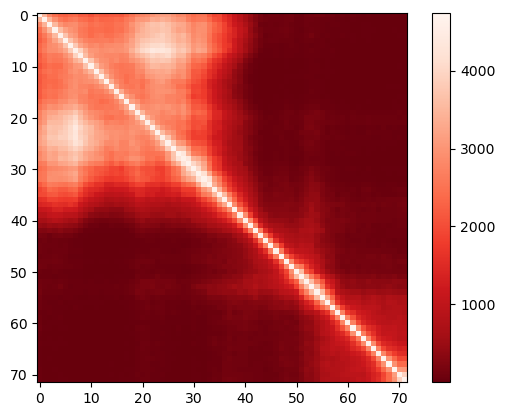

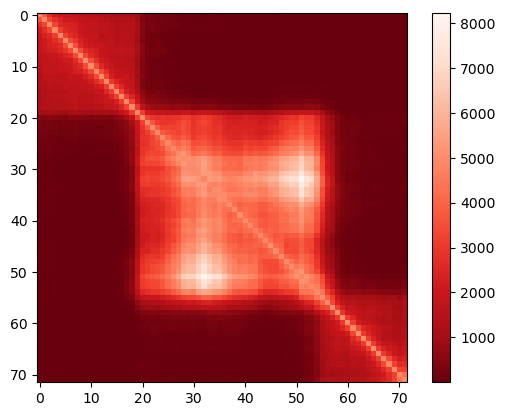

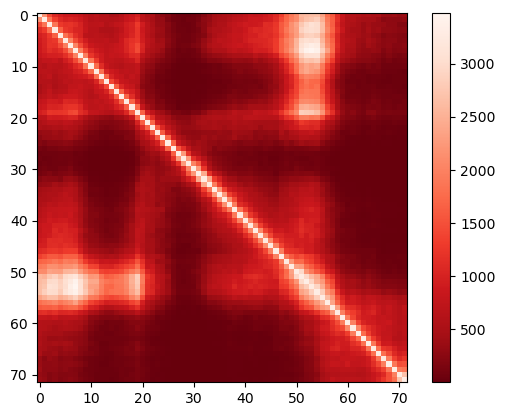

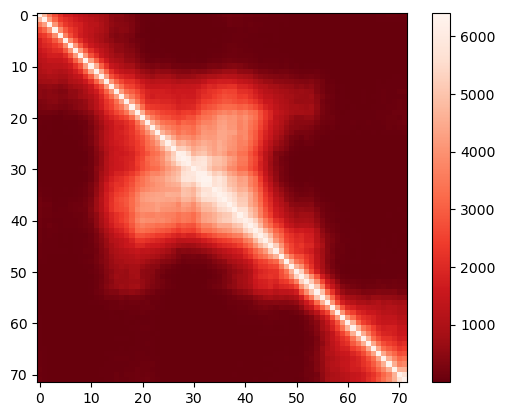

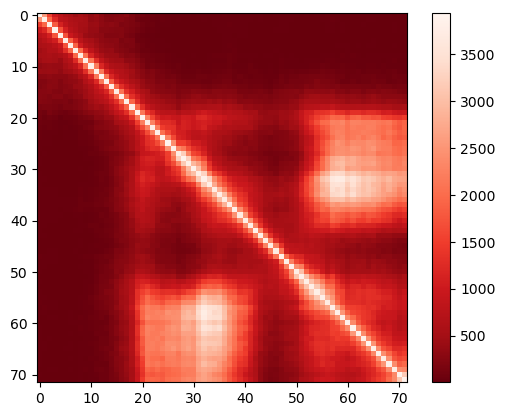

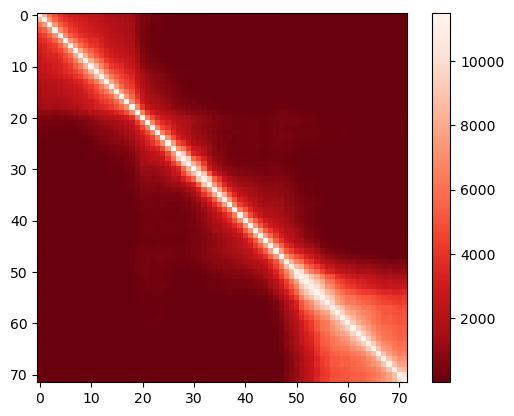

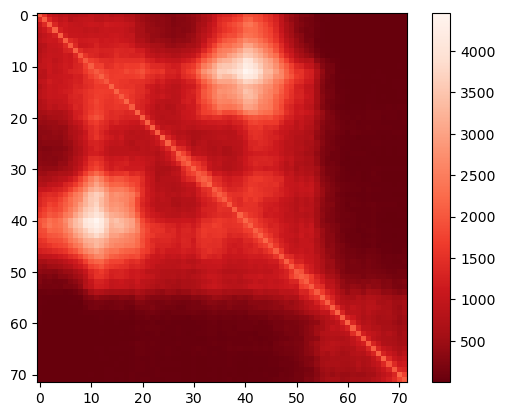

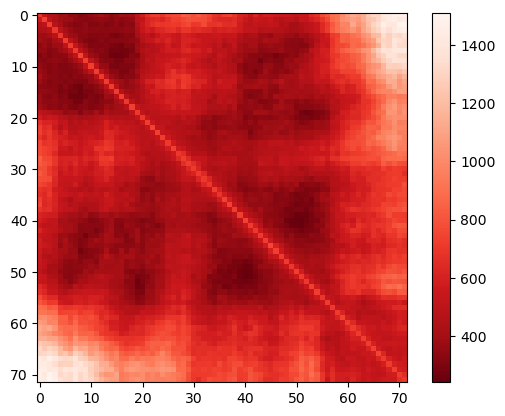

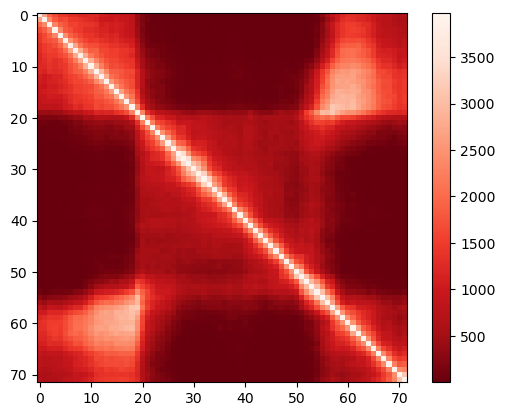

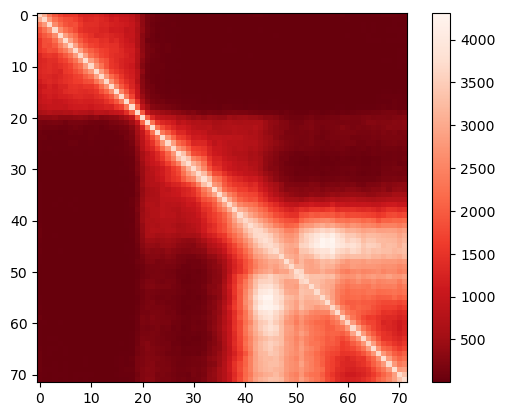

In [15]:
for x in hoxLDAComponents:
    plt.imshow(x.reshape(nHox, nHox), cmap='Reds_r')
    plt.colorbar()
    plt.show()

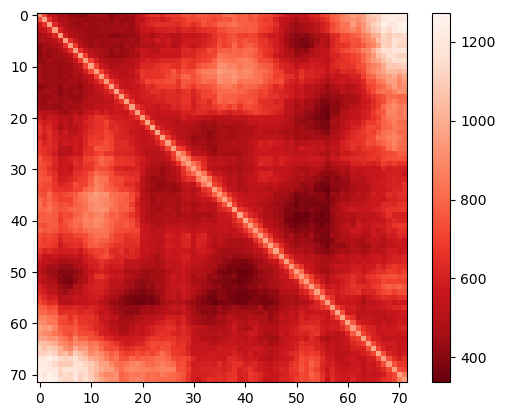

In [22]:
plt.imshow((ntLDAHox[0, :] @ hoxLDAComponents).reshape(nHox, nHox), cmap='Reds_r')
plt.colorbar()

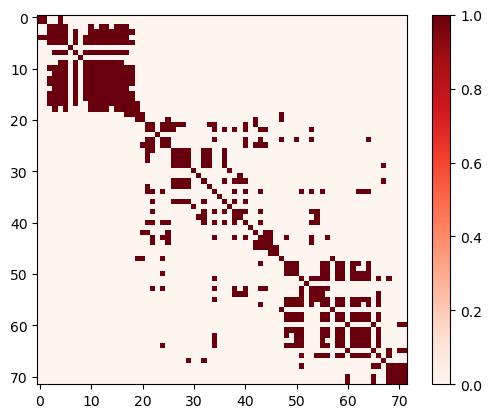

In [25]:
plt.imshow(ntContactHox[0], cmap='Reds')
plt.colorbar()

In [20]:
ntLDAHox.shape

(15319, 10)